<a href="https://colab.research.google.com/github/alceu-castanheira/Bootcamp-Data-Science-Alura-2020/blob/main/Projeto_M%C3%B3dulo_01_Alceu_Farias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp de Data Science Aplicado da Alura - Projeto M√≥dulo 01**

## **An√°lise dos dados de COVID-19 no DF e na regi√£o do Entorno**

* **Aluno:** Alceu Bernardes Castanheira de Farias
* **Github:** https://github.com/alceu-castanheira
* **LinkedIn:** https://www.linkedin.com/in/alceu-bernardes-castanheira-de-farias-1002851b4/

### **1) Introdu√ß√£o**

- Ol√° a todos! Me chamo Alceu, estou iniciando na √°rea de Data Science e como proposta de Projeto para o M√≥dulo 01 do Bootcamp de Data Science Aplicado da Alura, eu resolvei analisar os dados de COVID-19 da regi√£o em que moro, o Distrito Federal.




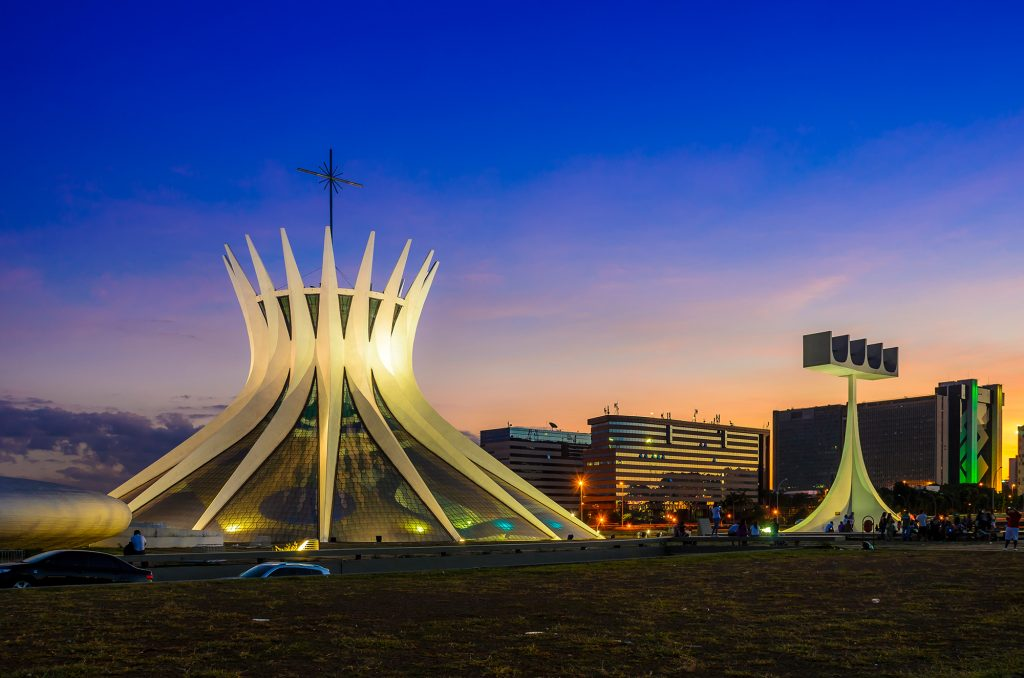

- Uma caracter√≠stica importante relacionada ao DF √© de que existem cidades de outros estados que, por estarem mais pr√≥ximas geograficamente da capital, possuem grande parte da popula√ß√£o trabalhando ou usufruindo de servi√ßos de sa√∫de, educa√ß√£o e transporte do DF. 

- Isso ocorre por se encontram mais perto de Bras√≠lia do que da capital do estado do qual essas cidades fazem parte, por exemplo. 



- Por conta disso, em 1998, foi criada A **Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE)**, que abrange uma grande quantidade de munic√≠pios do Distrito Federal, Goi√°s e Minas Gerais. Esses munic√≠pios integram uma √°rea de planejamento e gera√ß√£o de pol√≠ticas p√∫blicas comuns a eles, a fim de propiciar o desenvolvimento da sua popula√ß√£o [1]. 

- Nessa regi√£o h√° munic√≠pios com os mais variados graus de desenvolvimento econ√¥mico e social e com v√°rias disparidades. Dessa forma, a cria√ß√£o da RIDE, na teoria, sup√µe uma integra√ß√£o entre esses munic√≠pios para que tais disparidades e desigualdades sejam diminu√≠das ao longo dos anos [1].

- Abaixo, temos uma imagem dos munic√≠pios que comp√µem a RIDE, que foi atualizada pela √∫ltima vez com a Lei Complementar n¬∫ 163, de 14 de junho de 2018.

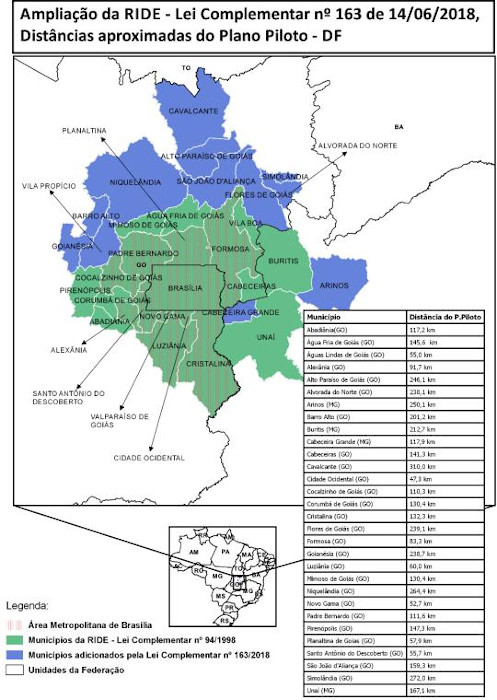

- Por isso, meu objetivo neste Projeto do M√≥dulo 01 √© **realizar uma an√°lise dos dados de COVID-19 no DF e nas regi√µes do Entorno**, comparando ambos para ver se √© poss√≠vel obter alguma rela√ß√£o entre eles.

- Os dados utilizados nesse projeto foram obtidos de um reposit√≥rio de dados p√∫blicos disponibilizados no portal Brasil.IO [2]. A an√°lise leva em considera√ß√£o dados recolhidos at√© a data de 21 de novembro de 2020.

- Estaremos trabalhando com a tabela de dados denominada caso.csv, que √© um dos datasets disponibilizados no site. Veremos com mais detalhes o que comp√µem esse dataset na pr√≥xima se√ß√£o deste notebook.

### **2) Importando os dados de COVID-19**

In [1]:
# Importando bibliotecas do Python para serem utilizadas no notebook:
# 
# Pandas => biblioteca de importa√ß√£o e manipula√ß√£o dos dados
# Matplotlib => Biblioteca para ajustes finos nos gr√°ficos
# Seaborn => Biblioteca de gera√ß√£o de gr√°ficos base do projeto
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados do arquivo 'caso.csv' e salvando em um dataframe chamado dados
#
dados = pd.read_csv('caso.csv');

# Exibindo os cinco primeiros dados do dataframe (head)
#
dados.head()

date state  ... confirmed_per_100k_inhabitants death_rate
0  2020-11-21    AC  ...                     3849.76578     0.0207
1  2020-11-20    AC  ...                     3828.63595     0.0208
2  2020-11-19    AC  ...                     3798.45048     0.0209
3  2020-11-18    AC  ...                     3770.38917     0.0210
4  2020-11-17    AC  ...                     3742.43966     0.0212

[5 rows x 13 columns]

- Aqui podemos verificar que os dados foram importados corretamente e quais as colunas existentes no conjunto de dados com que trabalharemos [3]:

üîç **search:** passe algum valor para executar a busca por texto completo, que compreende algumas das colunas da tabela.

üîç **date:** data de coleta dos dados no formato YYYY-MM-DD.

üîç **state:** sigla da unidade federativa, exemplo: SP.

üîç **city:** nome do munic√≠pio (pode estar em branco quando o registro √© referente ao estado, pode ser preenchido com Importados/Indefinidos tamb√©m).

üîç **place_type:** tipo de local que esse registro descreve, pode ser city ou state.

üîç **order_for_place:** n√∫mero que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer ser√° contabilizado como 1 e os demais boletins incrementar√£o esse valor.

üîç **is_last:** campo pr√©-computado que diz se esse registro √© o mais novo para esse local, pode ser True ou False.

üîç **city_ibge_code:** c√≥digo IBGE do local.

üîç **confirmed:** n√∫mero de casos confirmados.

üîç **deaths:** n√∫mero de mortes.

üîç **estimated_population:** popula√ß√£o estimada para esse munic√≠pio/estado em 2020, segundo o IBGE. 

üîç **estimated_population_2019:** popula√ß√£o estimada para esse munic√≠pio/estado em 2019, segundo o IBGE. 
**ATEN√á√ÉO:** essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

üîç **confirmed_per_100k_inhabitants:** n√∫mero de casos confirmados por 100.000 habitantes (baseado em estimated_population).

üîç **death_rate:** taxa de mortalidade (mortes / confirmados).

- Al√©m das colunas, podemos observar a quantidade de linhas que foram importadas, para saber como quantos dados est√£o trabalhando no total:

In [2]:
print('No dataset importado de casos de COVID-19 temos um total de {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

No dataset importado de casos de COVID-19 temos um total de 1018071 linhas e 13 colunas


- Portanto, j√° que temos um grande n√∫mero de dados, precisamos **filtrar esse dataset para obter somente os dados que nos interessam.**

### **3) Analisando os dados de COVID-19 no Distrito Federal**

* Vamos analisar a quantidade de casos confirmados e de mortes por COVID-19 no Distrito Federal at√© a data mais recente dispon√≠vel no nosso conjunto de dados, que foi obtido na data de 21 de novembro de 2020.

- Como vimos na se√ß√£o anterior, a data mais atual dispon√≠vel √© marcada na coluna 'is_last' com o valor booleano 'True'.

- Logo, se quiremos analisar os dados do Distrito Federal, podemos filtrar a nossa busca (query) no dataset por estado ('state') e pela coluna ('is_last').

In [3]:
# Buscando no dataset os dados do df ('state == "DF"') mais atuais ('is_last == True') por meio de uma query.
# Os dados s√£o salvos no dataframe dados_DF
#
dados_DF = dados.query('state == "DF" & is_last == True')

# Visualizando os 5 primeiros dados do dataset (head)
#
dados_DF.head()

date state  ... confirmed_per_100k_inhabitants death_rate
21694  2020-11-21    DF  ...                     7311.52556     0.0173
21953  2020-11-20    DF  ...                     6396.31651     0.0181
22211  2020-11-20    DF  ...                            NaN     0.0113

[3 rows x 13 columns]

- O resultado obtido √© interessante porque nos mostra algumas caracter√≠sticas interessantes sobre o dataset:


**1)** Quando temos na coluna 'city' o valor NaN, parece se tratar dos dados referentes ao estado como um todo, considerando todas suas cidades. Podemos confirmar isso pois o n√∫mero de casos confirmados e mortes para essa linha (223378 e 3862, respectivamente) √© aproximadamente a soma do n√∫mero de casos confirmados e mortes de Bras√≠lia e Importados/Indefinidos (222836 e 3857, respectivamente). 

**2)** H√° uma pequena diferen√ßa entre a soma anterior e o resultado dispon√≠vel por conta da data: os dados j√° incluem a totaliza√ß√£o de casos e mortes no DF para o dia 21 de novembro de 2020, mas individualmente temos os dados de Bras√≠lia e casos Importados/Indefinidos atualizados somente at√© o dia 20 de novembro.

**3)** Assim, a diferen√ßa de casos confirmados (542) e de mortes (4) corresponde √† quantidade de casos confirmados e mortes que ocorreram no Distrito Federal em 21 de novembro de 2020, mas com base no nosso dataset, n√£o √© poss√≠vel analisar quais dados s√£o de Bras√≠lia e quais s√£o importados/indefinidos.

**4)** Por isso, o NaN √© um valor importante na coluna 'city'. Temos que ter isso em mente para n√£o ignor√°-lo ou elimin√°-lo do dataset em an√°lises futuras.

- Outra quest√£o interessante √© que no Distrito Federal s√≥ temos Bras√≠lia listada como cidade. Originalmente, Brasilia era composta pelo Plano Piloto (Asa Sul e Asa Norte) e por v√°rias regi√µes administrativas conhecidas popularmente como cidades sat√©lite. Essas regi√µes hoje em dia n√£o consideradas cidades, mas sim bairros. Por isso, no dataset, s√≥ temos Bras√≠lia listada como cidade.


- Isso dificulta a realizar uma an√°lise mais profunda, por exemplo, analisar os dados de COVID-19 por regi√µes do DF. Portanto, analisamos o Distrito Federal como um todo.

* Vamos analisar os dados at√© o dia 20 de novembro para poder avaliar a quantidade de casos/mortes que s√£o importados/indefinidos em compara√ß√£o com os dados origin√°rios de Bras√≠lia.

In [4]:
print('O n√∫mero de casos confirmados de COVID-19 em Bras√≠lia at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[1]['confirmed']))
print('O n√∫mero de casos confirmados de COVID-19 Importados/Indefinidos no DF at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[2]['confirmed']))
print('O n√∫mero total de casos confirmados de COVID-19 no DF at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[1]['confirmed'] + dados_DF.iloc[2]['confirmed']))

O n√∫mero de casos confirmados de COVID-19 em Bras√≠lia at√© o dia 20/11/20 √© de: 195417
O n√∫mero de casos confirmados de COVID-19 Importados/Indefinidos no DF at√© o dia 20/11/20 √© de: 27419
O n√∫mero total de casos confirmados de COVID-19 no DF at√© o dia 20/11/20 √© de: 222836


In [5]:
print('O n√∫mero de mortes por COVID-19 em Bras√≠lia at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[1]['deaths']))
print('O n√∫mero de mortes por COVID-19 de casos Importados/Indefinidos no DF at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[2]['deaths']))
print('O n√∫mero total de mortes COVID-19 no DF at√© o dia 20/11/20 √© de: {}'.format(dados_DF.iloc[1]['deaths'] + dados_DF.iloc[2]['deaths']))

O n√∫mero de mortes por COVID-19 em Bras√≠lia at√© o dia 20/11/20 √© de: 3546
O n√∫mero de mortes por COVID-19 de casos Importados/Indefinidos no DF at√© o dia 20/11/20 √© de: 311
O n√∫mero total de mortes COVID-19 no DF at√© o dia 20/11/20 √© de: 3857


* Podemos visualizar a porcentagem dessas informa√ß√µes por meio de gr√°ficos de pizza. Ok, ok, sabemos que n√£o √© o tipo de gr√°fico mais aconselhado, mas para esse tipo de situa√ß√£o em que temos duas categorias (Dados de Bras√≠lia e Importados/Indefinidos), o gr√°fico funciona melhor.

Text(0.5, 1.0, 'Porcentagem de casos confirmados de COVID-19 em origin√°rios em Bras√≠lia ou Importados/Indefinidos at√© 20/11/2020')

<Figure size 1440x1440 with 0 Axes>

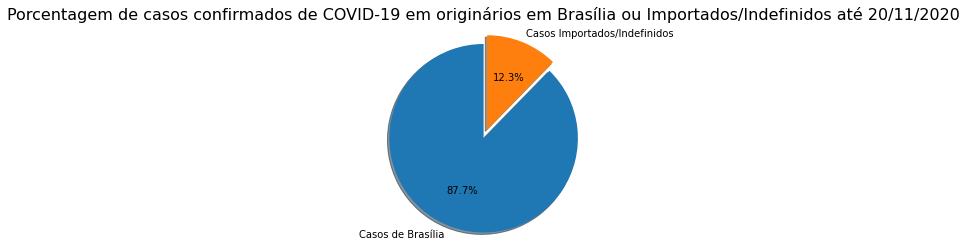

In [6]:
# Gr√°fico realizado com base em: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
#
# Definindo o tamanho da figura 
#
plt.figure(figsize=(20,20))

# Labels do gr√°fico, ordenados no sentido anti-hor√°rio:
#
labels = 'Casos de Bras√≠lia', 'Casos Importados/Indefinidos'

# Quantitaivo de cada label 
#
sizes = [195417, 27419]

# Explodir a segunda fatia do gr√°fico, para criar um pequeno 3D
#
explode = (0, 0.1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Garantir que o gr√°fico ser√° desenhado como um c√≠rculo
#
ax1.axis('equal')  

# Adicionando t√≠tulo ao gr√°fico
#
plt.title('Porcentagem de casos confirmados de COVID-19 em origin√°rios em Bras√≠lia ou Importados/Indefinidos at√© 20/11/2020', fontsize=16)

Text(0.5, 1.0, 'Porcentagem de mortes por COVID-19 origin√°rias de Bras√≠lia ou Importdadas/Indefinidas at√© 20/11/2020')

<Figure size 1440x1440 with 0 Axes>

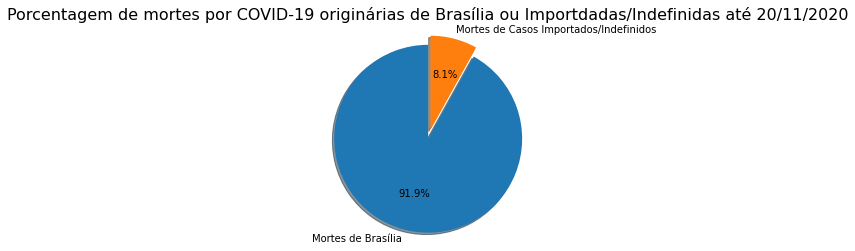

In [7]:
# Tamanho da figura
#
plt.figure(figsize=(20,20))

labels = 'Mortes de Bras√≠lia', 'Mortes de Casos Importados/Indefinidos'

# Quantitaivo de cada label
#
sizes = [3546, 311]

# Explodir a segunda fatia do gr√°fico, para criar um pequeno 3D
#
explode = (0, 0.1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Garantir que o gr√°fico ser√° desenhado como um c√≠rculo
#
ax1.axis('equal')  

# Adicionando t√≠tulo ao gr√°fico
#
plt.title('Porcentagem de mortes por COVID-19 origin√°rias de Bras√≠lia ou Importdadas/Indefinidas at√© 20/11/2020', fontsize=16)

# Exibindo o gr√°fico
#
#plt.show()

* Ou seja, temos aproximadamente **12.3% de casos importados/indefinidos no DF e um total de 8.1% de mortes de pacientes que n√£o residem no DF**.

* Esse n√∫mero/porcentagem √© grande comparado aos valores de outros estados? Vamos comparar.

### **4) Analisando os dados de COVID-19 em Goi√°s**

- Como vimos anteriormente, a regi√£o do Entorno cont√©m cidades pertencentes ao estado de Goi√°s e ao estado de Minas Gerais. Por isso, vamos come√ßar analisar rapidamente o n√∫mero de casos de COVID-19 em Goi√°s, passando posteriormente para Minas Gerais

* Vamos buscar os dados mais recentes de COVID-19 referentes ao estado de Goi√°s no nosso dataset, de maneira an√°loga a como procedemos com o DF:

In [8]:
dados_GO = dados.query('state == "GO" & is_last == True')
dados_GO.head(5)

date state  ... confirmed_per_100k_inhabitants death_rate
190344  2020-11-21    GO  ...                     3841.04117     0.0229
190599  2020-11-19    GO  ...                     7702.61219     0.0101
190782  2020-11-19    GO  ...                      860.17301     0.0682
190957  2020-11-19    GO  ...                     4448.68269     0.0249
191129  2020-11-19    GO  ...                     3457.86963     0.0230

[5 rows x 13 columns]

* Aqui vemos a diferen√ßa do dataframe dados_GO em rela√ß√£o ao dataframe dados_DF, pois temos v√°rias cidades em Goi√°s:

In [9]:
print('O n√∫mero de cidades no estado de GO listada no nosso conjunto de dados √© de: {}'.format(dados_GO.shape[0]-2))

O n√∫mero de cidades no estado de GO listada no nosso conjunto de dados √© de: 246


* No resultado acima retiramos 2 linhas, que s√£o referente aos estado como um todo ('city = NaN') e os casos Importados/Indefinidos.

* Agora podemmos analisar os dados de casos confirmados e mortes no estado de Goi√°s e comparar com os dados do Distrito Federal. Para isso, utilizamos a primeira linha dos dataframes, que contem dados de todas as cidades ('city = NaN'):

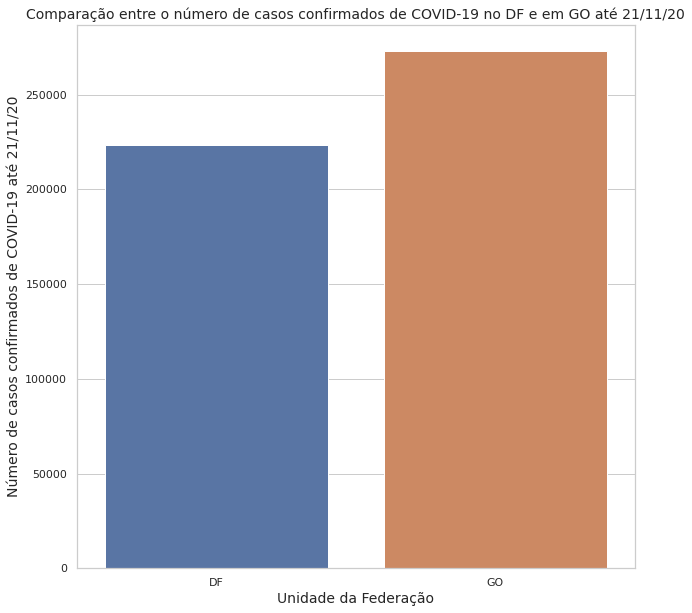

In [10]:
casos_DF = dados_DF.iloc[0]['confirmed']
mortes_DF = dados_DF.iloc[0]['deaths']

casos_GO = dados_GO.iloc[0]['confirmed']
mortes_GO = dados_GO.iloc[0]['deaths']

casos = [casos_DF, casos_GO]
mortes = [mortes_DF, mortes_GO]

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO'], y = casos)
plt.xlabel('Unidade da Federa√ß√£o',fontsize=14)
plt.ylabel('N√∫mero de casos confirmados de COVID-19 at√© 21/11/20',fontsize=14)
plt.title('Compara√ß√£o entre o n√∫mero de casos confirmados de COVID-19 no DF e em GO at√© 21/11/20', fontsize=14)
plt.show()

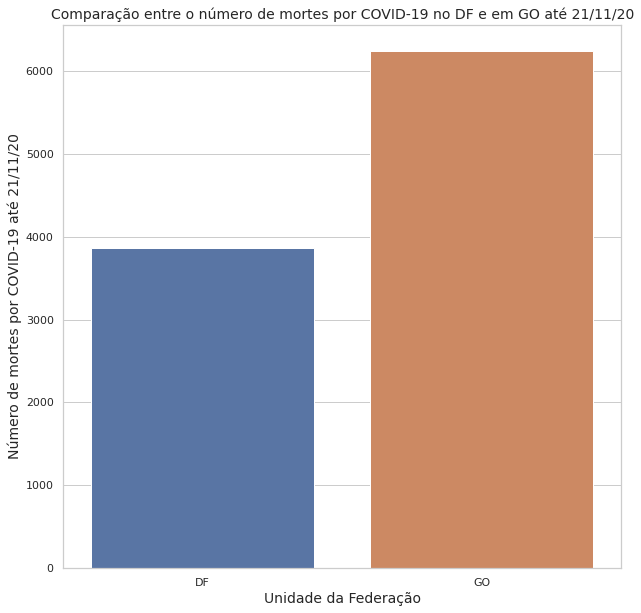

In [11]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO'], y = mortes)
plt.xlabel('Unidade da Federa√ß√£o',fontsize=14)
plt.ylabel('N√∫mero de mortes por COVID-19 at√© 21/11/20',fontsize=14)
plt.title('Compara√ß√£o entre o n√∫mero de mortes por COVID-19 no DF e em GO at√© 21/11/20', fontsize=14)
plt.show()

In [12]:
print('A diferen√ßa de casos confirmados de COVID-19 entre GO e DF at√© o dia 21/11/20 √© de: {}'.format(dados_GO.iloc[0]['confirmed'] - dados_DF.iloc[0]['confirmed']))
print('A diferen√ßa de mortes por COVID-19 entre GO e DF at√© o dia 21/11/20 √© de: {}'.format(dados_GO.iloc[0]['deaths'] - dados_DF.iloc[0]['deaths']))

A diferen√ßa de casos confirmados de COVID-19 entre GO e DF at√© o dia 21/11/20 √© de: 49856
A diferen√ßa de mortes por COVID-19 entre GO e DF at√© o dia 21/11/20 √© de: 2382


In [13]:
print('O estado de GO possui {:.2f} vezes mais casos confirmados de COVID-19 do que o DF'.format(dados_GO.iloc[0]['confirmed']/dados_DF.iloc[0]['confirmed']))
print('O estado de GO possui {:.2f} vezes mais mortes COVID-19 do que o DF'.format(dados_GO.iloc[0]['deaths']/dados_DF.iloc[0]['deaths']))

O estado de GO possui 1.22 vezes mais casos confirmados de COVID-19 do que o DF
O estado de GO possui 1.62 vezes mais mortes COVID-19 do que o DF


* Esses dados mostram uma r√°pida compara√ß√£o entre DF e GO, de forma que temos cerca de **1.22 vezes mais casos de COVID-19 em GO do que no DF, al√©m de 1.62 vezes mais mortes em GO**.


* Entretanto, √© importante analisar que GO √© um estado mais populoso do que o DF. De fato:


In [14]:
print('A popula√ß√£o do estado de GO √© de {} habitantes.'.format(dados_GO.iloc[0]['estimated_population']))
print('A popula√ß√£o do DF √© de {} habitantes.'.format(dados_DF.iloc[0]['estimated_population']))
print('O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em GO √©: {:.2f}'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes no DF √©: {:.2f}'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© {:.2f} vezes maior que em GO.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))

A popula√ß√£o do estado de GO √© de 7113540.0 habitantes.
A popula√ß√£o do DF √© de 3055149.0 habitantes.
O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em GO √©: 3841.04
O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes no DF √©: 7311.53
Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© 1.90 vezes maior que em GO.


* Ou seja, **ainda que no total haja mais casos confirmados de COVID-19 em Goi√°s, o n√∫mero de casos confirmados por 100 mil no DF √© quase o dobro do que em GO (1.9 vezes maior).**

* Vamos ent√£o, analisar os casos importados/indefinidos de COVID-19 em GO:

In [15]:
dados_GO.query('city == "Importados/Indefinidos"')

date state  ... confirmed_per_100k_inhabitants death_rate
209563  2020-11-19    GO  ...                            NaN        0.0

[1 rows x 13 columns]

* Em Goi√°s, n√£o temos casos importados/indefinidos, ou seja, **todos os casos confirmados de COVID-19 at√© 19 de novembro de 2020 no estado de Goi√°s s√£o origin√°rios do estado.**

###**5) Analisando os dados de COVID-19 em Minas Gerais**

* Vamos agora analisar o estado de Minas Gerais, pois temos 4 cidades do Entorno que pertencem a este estado.

* Vamos fazer a mesma busca que fizemos para DF e GO:

In [16]:
dados_MG = dados.query('state == "MG" & is_last == True')
dados_MG.head(5)

date state  ... confirmed_per_100k_inhabitants death_rate
363204  2020-11-21    MG  ...                     1857.60675     0.0246
363461  2020-11-20    MG  ...                     1484.44191     0.0096
363640  2020-11-20    MG  ...                      404.30108     0.0319
363845  2020-11-20    MG  ...                      855.40018     0.0087
363993  2020-11-20    MG  ...                     1577.36605     0.0317

[5 rows x 13 columns]

In [17]:
print('O n√∫mero de cidades no estado de MG listadas no nosso conjunto de dados √© de: {}'.format(dados_MG.shape[0]-2))

O n√∫mero de cidades no estado de MG listadas no nosso conjunto de dados √© de: 852


* Mais uma vez, retiramos duas das linhas totais do dataframe dados_MG, que correspondem √†s estat√≠sticas do estado como um todo e aos casos importados/indefinidos.

* Vamos comparar o n√∫mero de casos confirmados e mortes por COVID-19 no estado de MG com DF e GO:

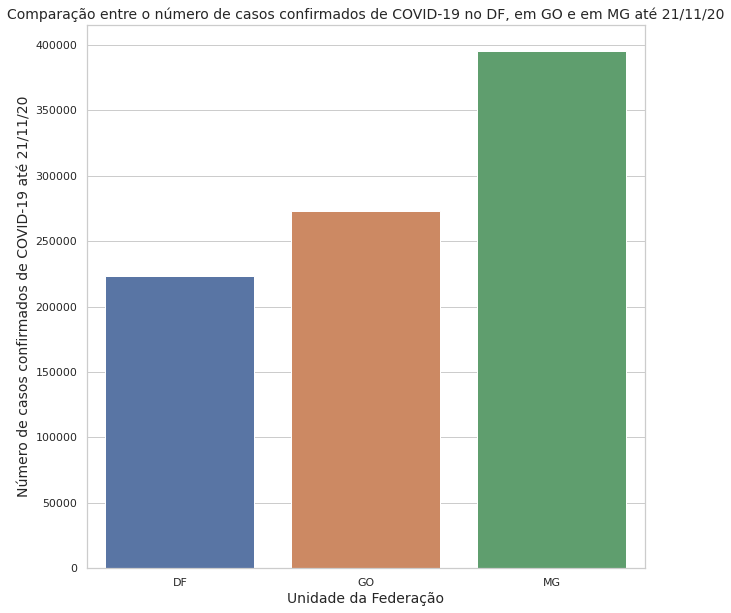

In [18]:
casos_DF = dados_DF.iloc[0]['confirmed']
mortes_DF = dados_DF.iloc[0]['deaths']

casos_GO = dados_GO.iloc[0]['confirmed']
mortes_GO = dados_GO.iloc[0]['deaths']

casos_MG = dados_MG.iloc[0]['confirmed']
mortes_MG = dados_MG.iloc[0]['deaths']

casos = [casos_DF, casos_GO, casos_MG]
mortes = [mortes_DF, mortes_GO, mortes_MG]

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO', 'MG'], y = casos)
plt.xlabel('Unidade da Federa√ß√£o',fontsize=14)
plt.ylabel('N√∫mero de casos confirmados de COVID-19 at√© 21/11/20',fontsize=14)
plt.title('Compara√ß√£o entre o n√∫mero de casos confirmados de COVID-19 no DF, em GO e em MG at√© 21/11/20', fontsize=14)
plt.show()

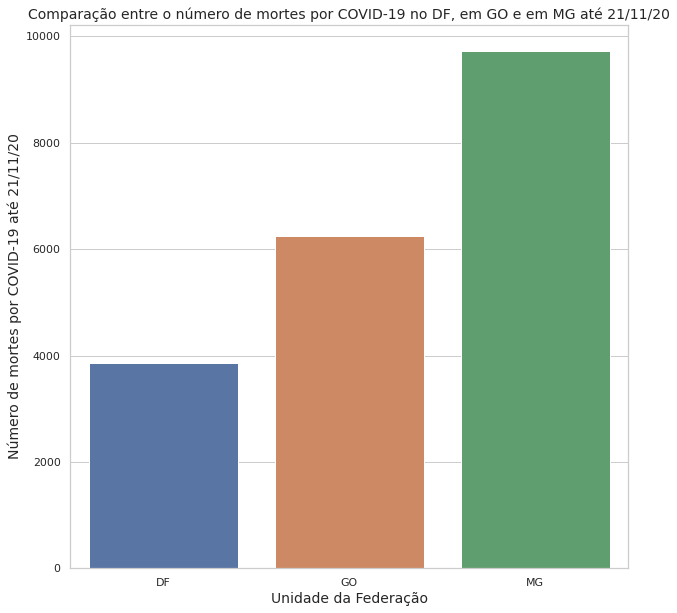

In [19]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO', 'MG'], y = mortes)
plt.xlabel('Unidade da Federa√ß√£o',fontsize=14)
plt.ylabel('N√∫mero de mortes por COVID-19 at√© 21/11/20',fontsize=14)
plt.title('Compara√ß√£o entre o n√∫mero de mortes por COVID-19 no DF, em GO e em MG at√© 21/11/20', fontsize=14)
plt.show()

In [20]:
print('A diferen√ßa de casos confirmados de COVID-19 entre MG e DF at√© o dia 21/11/20 √© de: {}'.format(dados_MG.iloc[0]['confirmed'] - dados_DF.iloc[0]['confirmed']))
print('A diferen√ßa de mortes por COVID-19 entre MG e DF at√© o dia 21/11/20 √© de: {}'.format(dados_MG.iloc[0]['deaths'] - dados_DF.iloc[0]['deaths']))

A diferen√ßa de casos confirmados de COVID-19 entre MG e DF at√© o dia 21/11/20 √© de: 172156
A diferen√ßa de mortes por COVID-19 entre MG e DF at√© o dia 21/11/20 √© de: 5870


In [21]:
print('A diferen√ßa de casos confirmados de COVID-19 entre MG e GO at√© o dia 21/11/20 √© de: {}'.format(dados_MG.iloc[0]['confirmed'] - dados_GO.iloc[0]['confirmed']))
print('A diferen√ßa de mortes por COVID-19 entre MG e GO at√© o dia 21/11/20 √© de: {}'.format(dados_MG.iloc[0]['deaths'] - dados_GO.iloc[0]['deaths']))

A diferen√ßa de casos confirmados de COVID-19 entre MG e GO at√© o dia 21/11/20 √© de: 122300
A diferen√ßa de mortes por COVID-19 entre MG e GO at√© o dia 21/11/20 √© de: 3488


In [22]:
print('O estado de MG possui {:.2f} vezes mais casos confirmados de COVID-19 do que o DF'.format(dados_MG.iloc[0]['confirmed']/dados_DF.iloc[0]['confirmed']))
print('O estado de MG possui {:.2f} vezes mais mortes COVID-19 do que o DF'.format(dados_MG.iloc[0]['deaths']/dados_DF.iloc[0]['deaths']))

O estado de MG possui 1.77 vezes mais casos confirmados de COVID-19 do que o DF
O estado de MG possui 2.52 vezes mais mortes COVID-19 do que o DF


In [23]:
print('O estado de MG possui {:.2f} vezes mais casos confirmados de COVID-19 do que em GO'.format(dados_MG.iloc[0]['confirmed']/dados_GO.iloc[0]['confirmed']))
print('O estado de MG possui {:.2f} vezes mais mortes COVID-19 do que GO'.format(dados_MG.iloc[0]['deaths']/dados_GO.iloc[0]['deaths']))

O estado de MG possui 1.45 vezes mais casos confirmados de COVID-19 do que em GO
O estado de MG possui 1.56 vezes mais mortes COVID-19 do que GO


* Podemos ver, tanto graficamente quanto estatisticamente que **MG √© o estado com mais n√∫meros de casos confirmados e mortes por COVID-19 das Unidades da Federa√ß√£o avaliadas at√© aqui com 1.77 vezes mais casos confirmados do que o DF, 1.45 vezes mais casos confirmados do que GO, 2.52 vezes mais mortes do que no DF e 1.56 vezes mais mortes do que GO.** 


* Mas assim como na se√ß√£o anterior, **√© importante analisar a quantidade de casos por 100 mil habitantes, j√° que Minas Gerais √© o 3¬∫ estado mais populoso do Brasil:**


In [24]:
print('A popula√ß√£o do estado de MG √© de {} habitantes.'.format(dados_MG.iloc[0]['estimated_population']))
print('A popula√ß√£o do estado de GO √© de {} habitantes.'.format(dados_GO.iloc[0]['estimated_population']))
print('A popula√ß√£o do DF √© de {} habitantes.'.format(dados_DF.iloc[0]['estimated_population']))

A popula√ß√£o do estado de MG √© de 21292666.0 habitantes.
A popula√ß√£o do estado de GO √© de 7113540.0 habitantes.
A popula√ß√£o do DF √© de 3055149.0 habitantes.


In [25]:
print('O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em MG √©: {:.2f}'.format(dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))
print('O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em GO √©: {:.2f}'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes no DF √©: {:.2f}'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']))

O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em MG √©: 1857.61
O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes em GO √©: 3841.04
O n√∫mero casos confirmados de COVID-19 por 100 mil habitantes no DF √©: 7311.53


In [26]:
print('Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© {:.2f} vezes maior que em MG.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© {:.2f} vezes maior que em GO.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o n√∫mero de casos por 100 mil habitantes, a taxa em GO √© {:.2f} vezes maior que em MG.'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))

Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© 3.94 vezes maior que em MG.
Analisando o n√∫mero de casos por 100 mil habitantes, a taxa no DF √© 1.90 vezes maior que em GO.
Analisando o n√∫mero de casos por 100 mil habitantes, a taxa em GO √© 2.07 vezes maior que em MG.


* Novamente, **quando analisamos o n√∫mero de casos por 100 mil habitantes, o n√∫mero de casos no DF √© bem superior, cerca de 3.94 vezes maior do que em MG, mesmo com uma popula√ß√£o cerca de 6.97 vezes menor.**


* A taxa de casos por 100 mil habitantes de MG **tamb√©m √© menor do que a de GO, que √© 2.07 vezes maior.**

* Os dados mostram que a taxa de casos e de mortes no DF por 100 mil habitantes √© alta comparada a outros estados. Pesquisas recentes mostram que, inclusive, **a taxa de morte por COVID-19 no DF por milh√£o de habitantes √© a maior do pa√≠s [4].**

* Vamos ent√£o, analisar os casos importados/indefinidos de COVID-19 em MG:

In [27]:
dados_MG.query('city == "Importados/Indefinidos"')

date state  ... confirmed_per_100k_inhabitants death_rate
418880  2020-11-20    MG  ...                            NaN     0.0289

[1 rows x 13 columns]

* Vamos relembrar o n√∫mero de casos importados/indefinidos de COVID-19 para o DF:

In [28]:
dados_DF.query('city == "Importados/Indefinidos"')

date state  ... confirmed_per_100k_inhabitants death_rate
22211  2020-11-20    DF  ...                            NaN     0.0113

[1 rows x 13 columns]

* Mesmo com uma popula√ß√£o quase 7 vezes menor, **a quantidade de casos importados no DF √© muito maior do que em MG: cerca de 9.67 vezes mais.**

* Os casos importados correspondem a uma porcentagem bem pequena dos casos totais em MG: **cerca de 0.72% dos casos confirmados de COVID-19 em MG s√£o importados ou indefinidos.**

* Os dados n√£o nos permitem concluir quais casos importados ou indefinidos no DF s√£o do Entorno, mas nos mostram a necessidade de analisar n√£o s√≥ o n√∫mero de casos confirmados no DF, mas tamb√©m de cidades pr√≥ximas, **pois a porcentagem de casos importados √© alta e o n√∫mero de casos por 100 mil habitantes tamb√©m.**

### **6) An√°lise do hist√≥rico de casos de COVID-19 ao longo do ano no DF, em GO e MG**

* Vamos agora analisar n√£o somente o n√∫mero de casos atual das unidades da Federa√ß√£o analisadas anteriormente, mas tamb√©m como esse n√∫mero evoluiu desde mar√ßo, quando os primeiros casos come√ßaram a ser detectados.

* Para isso, vamos buscar os dados dos estados nos quais a cidade possui campo nulo (NaN) e armazenar em um dataframe:

#### **6.1) Organizando o hist√≥rico de dados de COVID-19 no DF ao longo do ano**

In [29]:
# Buscando os dados referentes √† coluna 'state' com o valor "DF" e armazenando 
# no dataframe historico_DF
#
historico_DF = dados.query('state == "DF"')

# Selecionando os dados no qual a coluna 'city' √© nula (NaN): s√£o os dados 
# referentes √† unidade da Federa√ß√£o como um todo
#
historico_DF = historico_DF[historico_DF['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_DF.head()

date state  ... confirmed_per_100k_inhabitants death_rate
21694  2020-11-21    DF  ...                     7311.52556     0.0173
21695  2020-11-20    DF  ...                     7293.78502     0.0173
21696  2020-11-19    DF  ...                     7275.65169     0.0173
21697  2020-11-18    DF  ...                     7250.90658     0.0174
21698  2020-11-17    DF  ...                     7234.70443     0.0174

[5 rows x 13 columns]

* Vemos que para cada estado temos os dados de COVID-19 por dia. Para que possamos visualizar isso de uma maneira um pouco melhor graficamente, vamos agrupar esses dados por m√™s, adaptando os dataframes criados:

In [30]:
# Modificando a data na coluna 'date' para o formato datetime do Python, para 
# podermos agrupar os dados mais facilmente
#
historico_DF['date'] = pd.to_datetime(historico_DF['date'])

# Vamos agrupar os dados nos dataframes por data, modificando a data no formato 
# YYYY-MM-DD para o m√™s ('%B') com a fun√ß√£o strftime. Pegamos a coluna que nos
# interessa ('confirmed', 'death', etc.), agregamos os valores (porque os valores 
# j√° s√£o atualizados, n√£o precisamos som√°-los), organizamos e resetamos o index
# para gerar como resultado um dataframe
#
historico_casos_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

In [31]:
# Dicion√°rio para mapear os valores dos meses de ingl√™s para portugu√™s
#
meses = {
    'March' : 'Mar√ßo',
    'April' : 'Abril',
    'May' : 'Maio',
    'June' : 'Junho',
    'July' : 'Julho',
    'August' : 'Agosto',
    'September' : 'Setembro',
    'October' : 'Outubro',
    'November' : 'Novembro'
}

# Substituindo os valores da coluna 'date' para os meses em portugu√™s nos 
# dataframes gerados anteriormente
#
historico_casos_DF = historico_casos_DF.replace({"date" : meses})
historico_mortes_DF = historico_mortes_DF.replace({"date": meses})

In [32]:
# Hist√≥rico de casos confirmados de COVID-19 no DF por m√™s em 2020
#
historico_casos_DF

date  confirmed
0     Mar√ßo        333
1     Abril       1423
2      Maio       9780
3     Junho      49218
4     Julho     106292
5    Agosto     162042
6  Setembro     192245
7   Outubro     213245
8  Novembro     223378

In [33]:
# Hist√≥rico de mortes por COVID-19 no DF por m√™s em 2020
#
historico_mortes_DF

date  deaths
0     Mar√ßo       3
1     Abril      30
2      Maio     170
3     Junho     587
4     Julho    1469
5    Agosto    2521
6  Setembro    3255
7   Outubro    3683
8  Novembro    3862

#### **6.2) Organizando o hist√≥rico de dados de COVID-19 em GO ao longo do ano**

In [34]:
# Buscando os dados referentes √† coluna 'state' com o valor "GO" e armazenando 
# no dataframe historico_GO
#
historico_GO = dados.query('state == "GO"')

# Selecionando os dados no qual a coluna 'city' √© nula (NaN): s√£o os dados 
# referentes √† unidade da Federa√ß√£o como um todo
#
historico_GO = historico_GO[historico_GO['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_GO.head()

date state  ... confirmed_per_100k_inhabitants death_rate
190344  2020-11-21    GO  ...                     3841.04117     0.0229
190345  2020-11-20    GO  ...                     3837.13313     0.0228
190346  2020-11-19    GO  ...                     3825.01539     0.0228
190347  2020-11-18    GO  ...                     3808.48354     0.0226
190348  2020-11-17    GO  ...                     3792.83732     0.0226

[5 rows x 13 columns]

In [35]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goi√°s:
#
historico_GO['date'] = pd.to_datetime(historico_GO['date'])
historico_casos_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_GO = historico_casos_GO.replace({"date": meses})
historico_mortes_GO = historico_mortes_GO.replace({"date": meses})

In [36]:
# Hist√≥rico de casos confirmados de COVID-19 em GO por m√™s em 2020
#
historico_casos_GO

date  confirmed
0     Mar√ßo         65
1     Abril        781
2      Maio       3726
3     Junho      24910
4     Julho      69249
5    Agosto     133796
6  Setembro     211240
7   Outubro     255646
8  Novembro     273234

In [37]:
# Hist√≥rico de mortes por COVID-19 em GO por m√™s em 2020
#
historico_mortes_GO

date  deaths
0     Mar√ßo       1
1     Abril      29
2      Maio     124
3     Junho     491
4     Julho    1677
5    Agosto    3159
6  Setembro    4705
7   Outubro    5755
8  Novembro    6244

#### **6.3) Organizando o hist√≥rico de dados de COVID-19 em MG ao longo do ano**

In [38]:
# Buscando os dados referentes √† coluna 'state' com o valor "MG" e armazenando 
# no dataframe historico_MG
#
historico_MG = dados.query('state == "MG"')

# Selecionando os dados no qual a coluna 'city' √© nula (NaN): s√£o os dados 
# referentes √† unidade da Federa√ß√£o como um todo
#
historico_MG = historico_MG[historico_MG['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_MG.head()

date state  ... confirmed_per_100k_inhabitants death_rate
363204  2020-11-21    MG  ...                     1857.60675     0.0246
363205  2020-11-20    MG  ...                     1846.22254     0.0246
363206  2020-11-19    MG  ...                     1833.19928     0.0247
363207  2020-11-18    MG  ...                     1821.05425     0.0248
363208  2020-11-17    MG  ...                     1810.13970     0.0247

[5 rows x 13 columns]

In [39]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goi√°s:
#
historico_MG['date'] = pd.to_datetime(historico_MG['date'])
historico_casos_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_MG = historico_casos_MG.replace({"date": meses})
historico_mortes_MG = historico_mortes_MG.replace({"date": meses})

In [40]:
# Hist√≥rico de casos confirmados de COVID-19 em MG por m√™s em 2020
#
historico_casos_MG

date  confirmed
0     Mar√ßo        275
1     Abril       1827
2      Maio      10464
3     Junho      45001
4     Julho     127106
5    Agosto     216557
6  Setembro     295169
7   Outubro     358971
8  Novembro     395534

In [41]:
# Hist√≥rico de mortes por COVID-19 em MG por m√™s em 2020
#
historico_mortes_MG

date  deaths
0     Mar√ßo       2
1     Abril      82
2      Maio     271
3     Junho     965
4     Julho    2769
5    Agosto    5335
6  Setembro    7360
7   Outubro    9015
8  Novembro    9732

#### **6.4) Compara√ß√£o dos hist√≥ricos de dados de COVID-19 no DF, em GO  e em MG ao longo do ano**

* Vamos ent√£o gerar um gr√°fico comparando os casos confirmados de COVID-19 no DF, em GO e em MG:

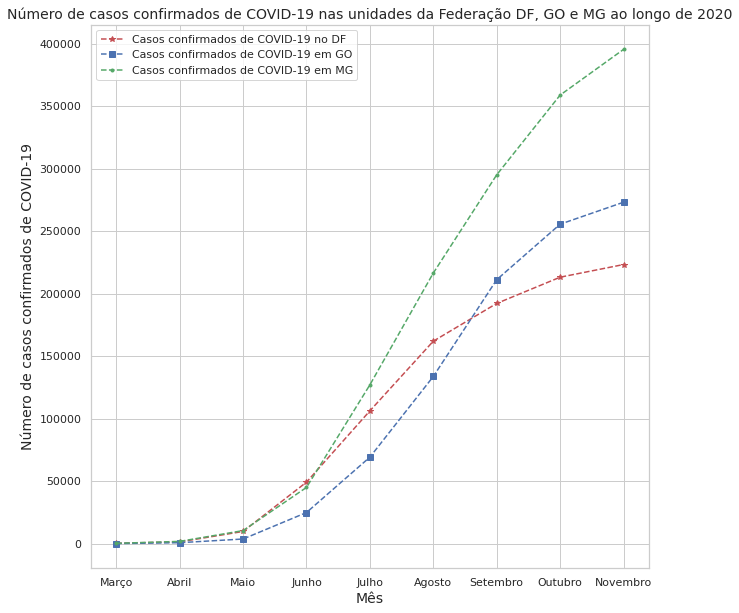

In [42]:
plt.figure(figsize=(10,10))

plt.plot(historico_casos_DF['date'], historico_casos_DF['confirmed'], 'r*--', 
         historico_casos_GO['date'], historico_casos_GO['confirmed'], 'bs--', 
         historico_casos_MG['date'], historico_casos_MG['confirmed'], 'g.--')

plt.legend(('Casos confirmados de COVID-19 no DF',
            'Casos confirmados de COVID-19 em GO',
            'Casos confirmados de COVID-19 em MG'))

plt.ylabel('N√∫mero de casos confirmados de COVID-19', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de casos confirmados de COVID-19 nas unidades da Federa√ß√£o DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O gr√°fico nos mostra o que era esperado: os casos de COVID-19 aumentaram ao longo dos meses. Mas √© interessante notar como os casos aumentam significativamente a partir de Maio, momento no qual enfrentamos o ponto mais cr√≠tico da pandemia.

* No caso do DF, o n√∫mero foi maior do que em GO at√© meados de Agosto. A partir dai, o n√∫mero de casos em GO se tornou maior.

* MG sempre possuiu mais casos confirmados do que DF e GO. Vale lembrar entretanto, que MG √© um estado muito mais populoso e isso √© esperado, conforme j√° vimos anteriormente.

* Vamos agora analisar os dados de mortes por COVID-19 no DF, em MG e em GO:

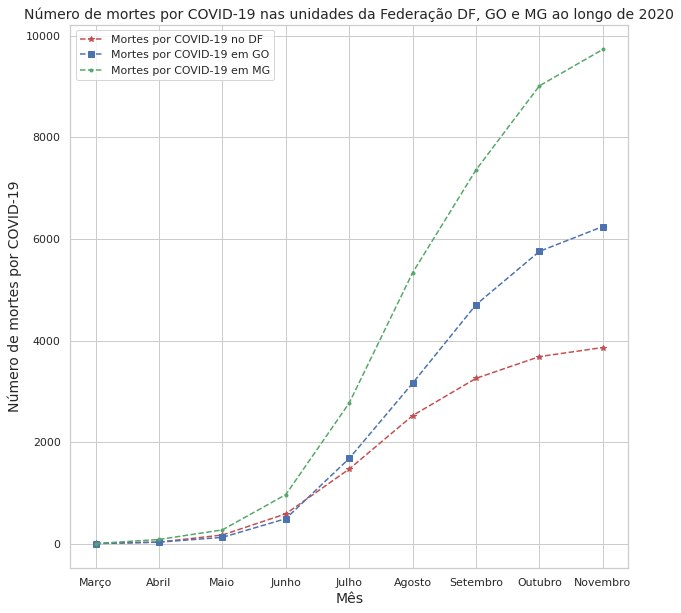

In [43]:
plt.figure(figsize=(10,10))

plt.plot(historico_mortes_DF['date'], historico_mortes_DF['deaths'], 'r*--', 
         historico_mortes_GO['date'], historico_mortes_GO['deaths'], 'bs--', 
         historico_mortes_MG['date'], historico_mortes_MG['deaths'], 'g.--')

plt.legend(('Mortes por COVID-19 no DF',
            'Mortes por COVID-19 em GO',
            'Mortes por COVID-19 em MG'))

plt.ylabel('N√∫mero de mortes por COVID-19', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de mortes por COVID-19 nas unidades da Federa√ß√£o DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O n√∫mero de mortes tamb√©m segue o padr√£o do n√∫mero de casos confirmados: inicialmente um n√∫mero maior no DF do que em GO, que mudam de posi√ß√£o em meados de Junho desta vez. 

* As mortes em MG s√£o mais numerosas que nesses estados, mais uma vez, por conta do tamanho de sua popula√ß√£o.

* A popula√ß√£o mais numerosa de MG torna a an√°lise inicial mais complicada. Vamos analisar o mesmo gr√°fico, mas agora do ponto de vista de casos confirmados por 100 mil habitantes:

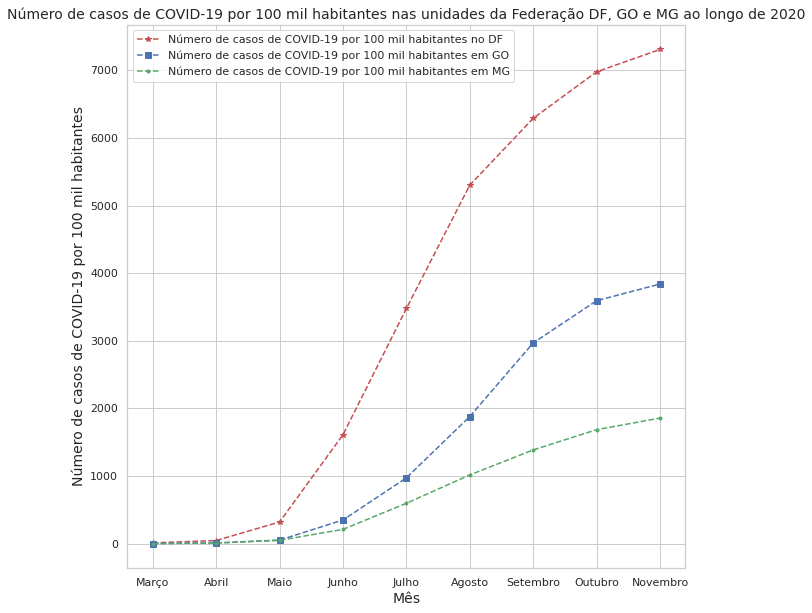

In [44]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goi√°s:
#
historico_casos_100k_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()
historico_casos_100k_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()
historico_casos_100k_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()

# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_100k_DF = historico_casos_100k_DF.replace({"date": meses})
historico_casos_100k_GO = historico_casos_100k_GO.replace({"date": meses})
historico_casos_100k_MG = historico_casos_100k_MG.replace({"date": meses})

plt.figure(figsize=(10,10))

plt.plot(historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_GO['date'], historico_casos_100k_GO['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_MG['date'], historico_casos_100k_MG['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('N√∫mero de casos de COVID-19 por 100 mil habitantes no DF',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes em GO',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes em MG'))

plt.ylabel('N√∫mero de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de casos de COVID-19 por 100 mil habitantes nas unidades da Federa√ß√£o DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O gr√°fico mostra que, mesmo com a menor popula√ß√£o das unidades da Federa√ß√£o analisadas aqui, o DF possui um total de casos confirmados por 100 mil habitantes bem maior do que os estados de GO e MG e que essa tend√™ncia se manteve em todos os meses do ano.

* Isso n√£o significa entretanto que o DF seja uma esp√©cie de epicentro da pandemia no pa√≠s. Na verdade, o DF √© um dos locais que mais testam para COVID-19 no pa√≠s [5], o que pode indicar que o n√∫mero de casos no DF √© mais realista do que em outros estados, que sofrem com subnotifica√ß√µes pela falta de teste.

* Portanto, o que se pode concluir neste etapa √© que **h√° um alto n√∫mero de casos por 100 mil habitantes no DF comparado com alguns estados mais pr√≥ximos**.



* Al√©m disso, como j√° vimos, **h√° uma alta taxa de casos importados/indefinidos (12.3%) no DF**, o que justifica analisar dados de estados ou cidades mais pr√≥ximas geograficamente para analisar como a situa√ß√£o referente ao COVID-19 nesses locais pode influenciar o DF. 

### **7) Analisando os dados de COVID-19 nas cidades do Entorno**

* Agora que analisamos os estados de MG e GO em sua totalidade, podemos analisar as cidades do Entorno propriamente ditas.

* Vamos criar listas com os nomes das cidades do Entorno que s√£o do estado de Goi√°s e das cidades do Entonro que fazem parte de MG:

####**7.1) Dados de COVID-19 das cidades do Entorno que fazem parte de GO**

In [45]:
# Lista com as cidades do Entorno que fazem parte de Goi√°s
#
cidades_entorno_GO = ["Abadi√¢nia", "√Ågua Fria de Goi√°s", "√Åguas Lindas de Goi√°s", 
                      "Alex√¢nia", "Alto Para√≠so de Goi√°s", "Alvorada do Norte", 
                      "Barro Alto", "Cabeceiras", "Cavalcante", "Cidade Ocidental", 
                      "Cocalzinho de Goi√°s", "Corumb√° de Goi√°s", "Cristalina",
                      "Flores de Goi√°s", "Formosa", "Goian√©sia", "Luzi√¢nia", 
                      "Mimoso de Goi√°s", "Niquel√¢ndia", "Novo Gama", "Padre Bernardo",
                      "Piren√≥polis", "Planaltina", "Santo Ant√¥nio do Descoberto",
                      "S√£o Jo√£o d‚ÄôAlian√ßa", "Simol√¢ndia", "Valpara√≠so de Goi√°s",
                      "Vila Boa", "Vila Prop√≠cio"];

# Lista com as cidades do Entorno que fazem parte de Minas Gerais
#
cidades_entorno_MG = ["Arinos", "Buritis", "Cabeceira Grande", "Una√≠"];

In [46]:
# Criando um dataframe que armazene as informa√ß√µes das cidades do Entorno de GO
#
dados_GO_entorno = dados_GO[dados_GO['city'].isin(cidades_entorno_GO)]

# Verificando o dataframe criado
#
dados_GO_entorno.head()

date state  ... confirmed_per_100k_inhabitants death_rate
190782  2020-11-19    GO  ...                      860.17301     0.0682
191297  2020-11-19    GO  ...                     4623.34880     0.0162
191856  2020-11-19    GO  ...                     4032.25806     0.0000
192050  2020-11-19    GO  ...                     3377.36933     0.0034
195585  2020-11-19    GO  ...                     5101.68303     0.0120

[5 rows x 13 columns]

In [47]:
print('O n√∫mero total de casos confirmados de COVID-19 nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: {}'.format(dados_GO_entorno['confirmed'].sum()))
print('O n√∫mero total de mortes por COVID-19 nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: {}'.format(dados_GO_entorno['deaths'].sum()))
print('A m√©dia de casos confirmados de COVID-19 por 100 mil habitantes nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: {:.2f}'.format(dados_GO_entorno['confirmed_per_100k_inhabitants'].mean()))

O n√∫mero total de casos confirmados de COVID-19 nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: 41626
O n√∫mero total de mortes por COVID-19 nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: 931
A m√©dia de casos confirmados de COVID-19 por 100 mil habitantes nos estados de GO que fazem parte do Entorno at√© 19/11/20 √©: 2527.65


In [48]:
print('O n√∫mero de casos confirmados de COVID-19 das cidades do Entorno de GO corresponde a {:.2f}% dos casos confirmados de GO'.format(dados_GO_entorno['confirmed'].sum()/dados_GO.iloc[0]['confirmed']*100))
print('O n√∫mero de mortes por COVID-19 das cidades do Entorno de GO corresponde a {:.2f}% das mortes de GO'.format(dados_GO_entorno['deaths'].sum()/dados_GO.iloc[0]['deaths']*100))
print('O n√∫mero de casos de COVID-19 por 100 mil habitantes de GO √© {:.2f} vezes maior que a m√©dia de casos por 100 mil habitantes das cidades do Entorno'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO_entorno['confirmed_per_100k_inhabitants'].mean()))

O n√∫mero de casos confirmados de COVID-19 das cidades do Entorno de GO corresponde a 15.23% dos casos confirmados de GO
O n√∫mero de mortes por COVID-19 das cidades do Entorno de GO corresponde a 14.91% das mortes de GO
O n√∫mero de casos de COVID-19 por 100 mil habitantes de GO √© 1.52 vezes maior que a m√©dia de casos por 100 mil habitantes das cidades do Entorno


* As cidades do Entorno de GO correspondem a **15.23% dos casos de COVID-19 do estado de Goi√°s, e 14.91% das mortes por COVID-19 do estado.**

* A m√©dia de casos confirmados por 100 mil habitantes √© relativamente pr√≥xima ao n√∫mero ao n√∫mero de casos por 100 mil habitantes do estado de GO.

* Portanto, a regi√£o do Entorno n√£o corresponde a uma porcentagem t√£o grande dos casos de Goi√°s. √â uma regi√£o pequena comparada ao restante do Estado, mas pela proximidade com o DF, √© importante monitorar a situa√ß√£o da regi√£o, ainda mais considerando a grande taxa de casos importados/indefinidos que vimos anteriormente no DF.

#### **7.2) Dados de COVID-19 das cidades do Entorno que pertencem a MG**

In [49]:
# Selecionando as cidades de Minas Gerais que fazem parte do Entorno e armazenando em um dataframe
#
dados_MG_entorno = dados_MG[dados_MG['city'].isin(cidades_entorno_MG)]

# Verificando o dataframe criado
#
dados_MG_entorno.head()

date state  ... confirmed_per_100k_inhabitants death_rate
370642  2020-11-20    MG  ...                      722.20356     0.0233
379263  2020-11-20    MG  ...                     1739.09567     0.0069
379566  2020-11-20    MG  ...                      686.89181     0.0417
496930  2020-11-20    MG  ...                     3459.31944     0.0194

[4 rows x 13 columns]

In [50]:
print('O n√∫mero total de casos confirmados de COVID-19 nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: {}'.format(dados_MG_entorno['confirmed'].sum()))
print('O n√∫mero total de mortes por COVID-19 nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: {}'.format(dados_MG_entorno['deaths'].sum()))
print('A m√©dia de casos confirmados de COVID-19 por 100 mil habitantes nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: {:.2f}'.format(dados_MG_entorno['confirmed_per_100k_inhabitants'].mean()))

O n√∫mero total de casos confirmados de COVID-19 nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: 3550
O n√∫mero total de mortes por COVID-19 nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: 65
A m√©dia de casos confirmados de COVID-19 por 100 mil habitantes nos estados de MG que fazem parte do Entorno at√© 20/11/20 √©: 1651.88


In [51]:
print('O n√∫mero de casos confirmados de COVID-19 das cidades do Entorno de MG corresponde a {:.2f}% dos casos confirmados de MG'.format(dados_MG_entorno['confirmed'].sum()/dados_MG.iloc[0]['confirmed']*100))
print('O n√∫mero de mortes por COVID-19 das cidades do Entorno de MG corresponde a {:.2f}% das mortes de MG'.format(dados_GO_entorno['deaths'].sum()/dados_MG.iloc[0]['deaths']*100))
print('O n√∫mero de casos de COVID-19 por 100 mil habitantes de MG √© {:.2f} vezes maior que a m√©dia de casos por 100 mil habitantes das cidades do Entorno'.format(dados_MG.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG_entorno['confirmed_per_100k_inhabitants'].mean()))

O n√∫mero de casos confirmados de COVID-19 das cidades do Entorno de MG corresponde a 0.90% dos casos confirmados de MG
O n√∫mero de mortes por COVID-19 das cidades do Entorno de MG corresponde a 9.57% das mortes de MG
O n√∫mero de casos de COVID-19 por 100 mil habitantes de MG √© 1.12 vezes maior que a m√©dia de casos por 100 mil habitantes das cidades do Entorno


* **Os casos de cidades do Entorno que s√£o de MG s√£o muito poucos comparados com os casos do estado de MG, assim como o n√∫mero de mortes.** 

* Isso √© de esperar tendo em vista que s√£o somente 4 cidades e MG √© o 3¬∫ estado brasileiro mais populoso.

* J√° a m√©dia de casos por 100 mil habitantes nessas 4 cidades do Entorno √© pr√≥xima ao n√∫mero de casos por 100 mil habitantes do estado como um todo. 

* De novo, apesar de ser comportar parecido com o estado do qual faz parte (em termos de casos por 100 mil habitantes), **as cidades do Entorno correspondem a uma parcela de casos muito pequena do estado de MG**.

* Mais uma vez, conv√©m analisar os casos nessa regi√£o pela **proximidade geogr√°fica com o DF e pelo alto n√∫mero de casos importados/importados do DF**.

### **8) Hist√≥rico de casos de COVID-19 ao longo do ano nas cidades do Entorno**

* Vamos ent√£o analisar o hist√≥rico de casos e de mortes nas cidades do Entorno, para analisar com os hist√≥ricos de seus respectivos estados e do DF.

####**8.1) Organizando o hist√≥rico de dados das cidades do Entorno que fazem parte de GO**

In [52]:
# Reunindo os dados referentes ao estado de GO
#
historico_entorno_GO = dados.query('state == "GO"')

# Selecionando somente as cidades que fazem parte do Entorno
#
historico_entorno_GO = historico_entorno_GO[historico_entorno_GO['city'].isin(cidades_entorno_GO)]

# Visualizando os dados selecionados
#
historico_entorno_GO.head()

date state  ... confirmed_per_100k_inhabitants death_rate
190782  2020-11-19    GO  ...                      860.17301     0.0682
190783  2020-11-18    GO  ...                      860.17301     0.0682
190784  2020-11-17    GO  ...                      860.17301     0.0682
190785  2020-11-16    GO  ...                      860.17301     0.0682
190786  2020-11-15    GO  ...                      860.17301     0.0682

[5 rows x 13 columns]

In [53]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['confirmed'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_entorno_GO['date'] = pd.to_datetime(historico_casos_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_casos_entorno_GO = historico_casos_entorno_GO.groupby(historico_casos_entorno_GO['date'].dt.strftime('%B'))['confirmed'].agg('last').sort_values().reset_index()

In [54]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_mortes_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['deaths'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_mortes_entorno_GO['date'] = pd.to_datetime(historico_mortes_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_mortes_entorno_GO = historico_mortes_entorno_GO.groupby(historico_mortes_entorno_GO['date'].dt.strftime('%B'))['deaths'].agg('last').sort_values().reset_index()

In [55]:
# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_entorno_GO = historico_casos_entorno_GO.replace({"date": meses})
historico_mortes_entorno_GO = historico_mortes_entorno_GO.replace({"date": meses})

In [56]:
# N√∫mero de casos confirmados de COVID-19 nas cidades do Entorno em GO por m√™s at√© 19/11/20
#
historico_casos_entorno_GO

date  confirmed
0     Mar√ßo          6
1     Abril         92
2      Maio        664
3     Junho       4266
4     Julho      10996
5    Agosto      21371
6  Setembro      31882
7   Outubro      38646
8  Novembro      41626

In [57]:
# N√∫mero de mortes por COVID-19 nas cidades do Entorno em GO por m√™s at√© 19/11/20
#
historico_mortes_entorno_GO

date  deaths
0     Mar√ßo       1
1     Abril       9
2      Maio      27
3     Junho     107
4     Julho     311
5    Agosto     553
6  Setembro     761
7   Outubro     877
8  Novembro     931

####**8.2) Organizando o hist√≥rico de dados das cidades do Entorno que fazem parte de MG**

In [58]:
# Selecionando os dados referentes ao estado de MG
#
historico_entorno_MG = dados.query('state == "MG"')

# Selecionando somente as cidades mineiras que fazem parte do Entorno
#
historico_entorno_MG = historico_entorno_MG[historico_entorno_MG['city'].isin(cidades_entorno_MG)]

# Visualizando o dataframe obtido
#
historico_entorno_MG.head()

date state  ... confirmed_per_100k_inhabitants death_rate
370642  2020-11-20    MG  ...                      722.20356     0.0233
370643  2020-11-19    MG  ...                      722.20356     0.0233
370644  2020-11-16    MG  ...                      711.00661     0.0236
370645  2020-11-14    MG  ...                      705.40813     0.0238
370646  2020-11-13    MG  ...                      705.40813     0.0238

[5 rows x 13 columns]

In [59]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['confirmed'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_entorno_MG['date'] = pd.to_datetime(historico_casos_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_casos_entorno_MG = historico_casos_entorno_MG.groupby(historico_casos_entorno_MG['date'].dt.strftime('%B'))['confirmed'].agg('last').sort_values().reset_index()

In [60]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_mortes_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['deaths'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_mortes_entorno_MG['date'] = pd.to_datetime(historico_mortes_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_mortes_entorno_MG = historico_mortes_entorno_MG.groupby(historico_mortes_entorno_MG['date'].dt.strftime('%B'))['deaths'].agg('last').sort_values().reset_index()

In [61]:
# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_entorno_MG = historico_casos_entorno_MG.replace({"date": meses})
historico_mortes_entorno_MG = historico_mortes_entorno_MG.replace({"date": meses})

In [62]:
# N√∫mero de casos confirmados de COVID-19 nas cidades do Entorno em MG por m√™s at√© 20/11/20
#
historico_casos_entorno_MG

date  confirmed
0     Mar√ßo          1
1     Abril          2
2      Maio         61
3     Junho        419
4     Julho       1321
5    Agosto       2222
6  Setembro       3007
7   Outubro       3253
8  Novembro       3550

In [63]:
# N√∫mero de mortes por COVID-19 nas cidades do Entorno em MG por m√™s at√© 20/11/20
#
historico_mortes_entorno_MG

date  deaths
0     Abril       0
1     Mar√ßo       0
2      Maio       0
3     Junho       1
4     Julho      14
5    Agosto      41
6  Setembro      56
7   Outubro      61
8  Novembro      65

####**8.3) Compara√ß√£o dos casos de COVID-19 ao longo do ano nas cidades do Entorno de GO, no DF e em GO**

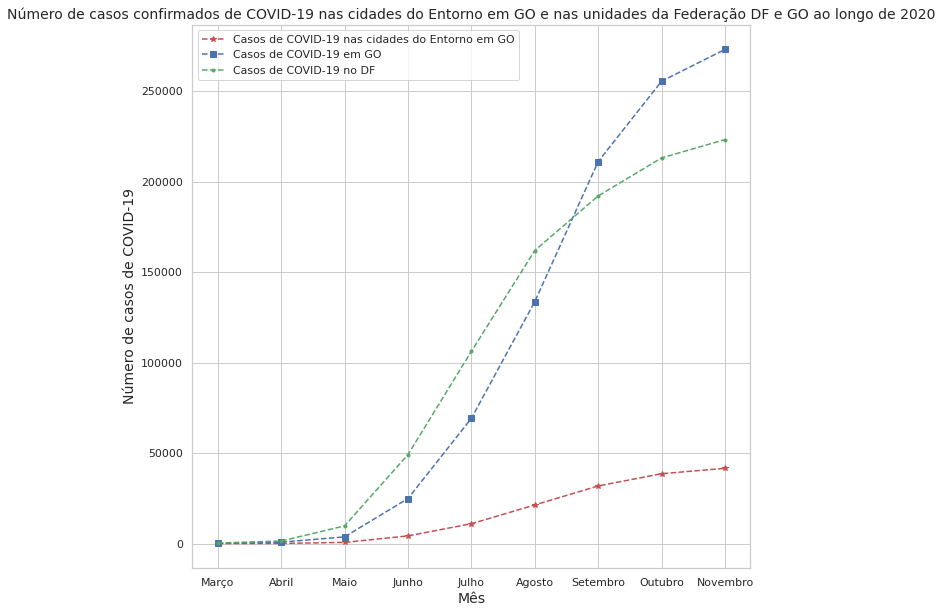

In [64]:
plt.figure(figsize=(10,10))

plt.plot(historico_casos_entorno_GO['date'], historico_casos_entorno_GO['confirmed'], 'r*--', 
         historico_casos_GO['date'], historico_casos_GO['confirmed'], 'bs--', 
         historico_casos_DF['date'], historico_casos_DF['confirmed'], 'g.--')

plt.ylabel('N√∫mero de casos de COVID-19', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de casos confirmados de COVID-19 nas cidades do Entorno em GO e nas unidades da Federa√ß√£o DF e GO ao longo de 2020', fontsize=14)

plt.legend(('Casos de COVID-19 nas cidades do Entorno em GO',
            'Casos de COVID-19 em GO',
            'Casos de COVID-19 no DF'))

plt.show()

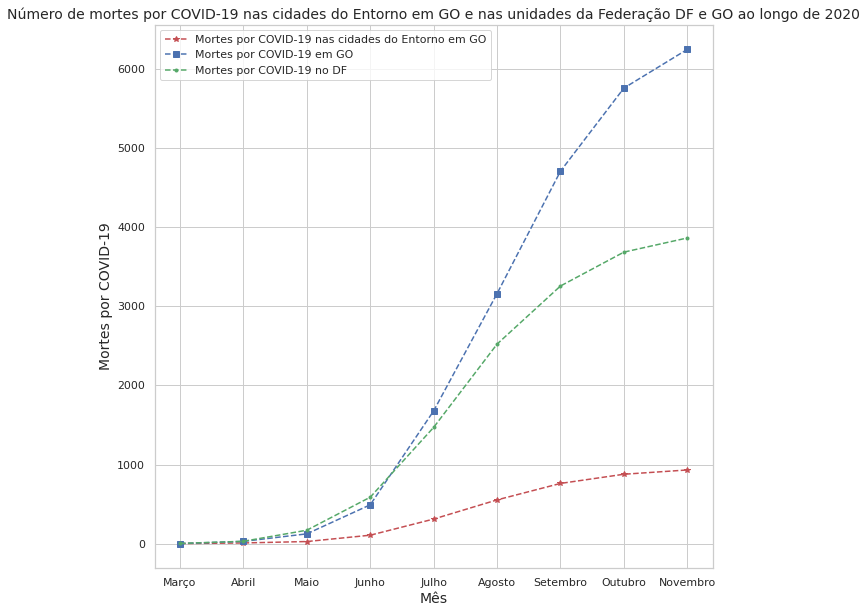

In [65]:
plt.figure(figsize=(10,10))

plt.plot(historico_mortes_entorno_GO['date'], historico_mortes_entorno_GO['deaths'], 'r*--', 
         historico_mortes_GO['date'], historico_mortes_GO['deaths'], 'bs--', 
         historico_mortes_DF['date'], historico_mortes_DF['deaths'], 'g.--')

plt.ylabel('Mortes por COVID-19', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de mortes por COVID-19 nas cidades do Entorno em GO e nas unidades da Federa√ß√£o DF e GO ao longo de 2020', fontsize=14)

plt.legend(('Mortes por COVID-19 nas cidades do Entorno em GO',
            'Mortes por COVID-19 em GO',
            'Mortes por COVID-19 no DF'))

plt.show()

* Tanto para o n√∫mero de casos confirmados quanto para o n√∫mero de mortes por COVID-19, os valores nas cidades do Entorno s√£o bem menores, como era de se esperar.

* De novo, precisamos dos dados por 100 mil habitantes para termos dados mais plaus√≠veis para compara√ß√£o:

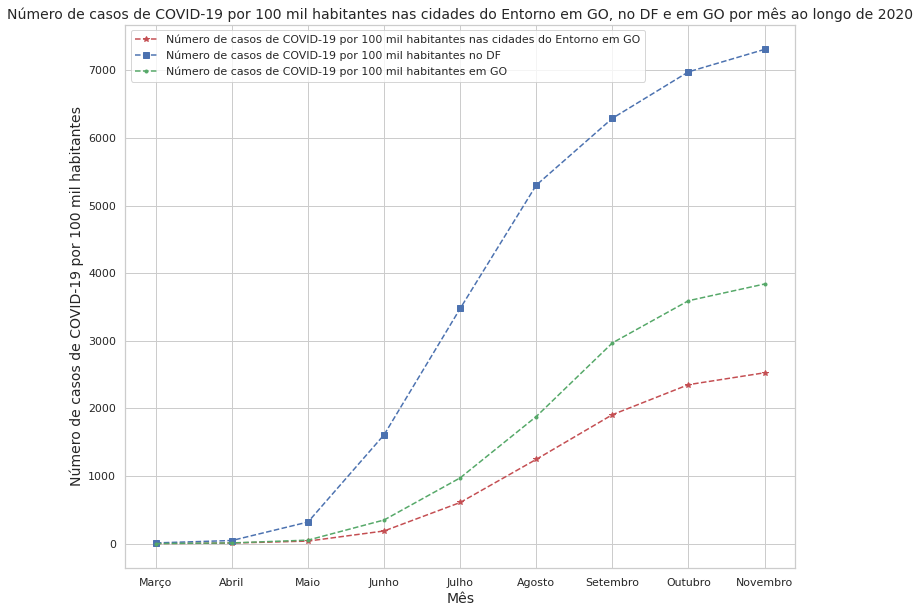

In [66]:
# Agrupando os casos confirmados por data, obtendo a m√©dia dos valores (para obter a m√©dia dos dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_100k_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['confirmed_per_100k_inhabitants'].mean().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_100k_entorno_GO['date'] = pd.to_datetime(historico_casos_100k_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_casos_100k_entorno_GO = historico_casos_100k_entorno_GO.groupby(historico_casos_100k_entorno_GO['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('last').sort_values().reset_index()

# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_100k_entorno_GO = historico_casos_100k_entorno_GO.replace({"date": meses})

plt.figure(figsize=(12,10))

plt.plot(historico_casos_100k_entorno_GO['date'], historico_casos_100k_entorno_GO['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_GO['date'], historico_casos_100k_GO['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('N√∫mero de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em GO',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes no DF',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes em GO'))

plt.ylabel('N√∫mero de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em GO, no DF e em GO por m√™s ao longo de 2020', fontsize=14)

plt.show()

* Agora sim temos condi√ß√µes de realizar melhores compara√ß√µes. Vemos, por exemplo, que assim como anteriormente, **o DF continua com o maior n√∫mero de casos confirmados de COVID-19 por 100 mil habitantes quando comparado ao estado de GO e √†s cidades do Entorno que pertencem ao GO**.

* Percebe-se tamb√©m que **o comportamento das cidades do Entorno por 100 mil habitantes de aproxima muito mais do comportamento do estado de GO**, do que quando analisamos somente o total de casos confirmados, por conta da maior popula√ß√£o que o estado de GO possui no total.

* Com base somente nos dados tratados aqui, **n√£o √© poss√≠vel estabelecer uma rela√ß√£o clara entre os casos de COVID-19 no Entorno e os casos do DF**.

* Entretanto os dados dessa regi√£o se aproximam dos dados de Goi√°s, com rela√ß√£o ao n√∫mero de 100 mil habitantes. **Pela proximidade geogr√°fica, e pela alta taxa de casos importados/indefinidos no DF, √© importante analisar os dados dessa regi√£o**.

In [67]:
dados_DF.iloc[0]['estimated_population']/dados_GO_entorno['estimated_population'].sum()

2.050757635762932

####**8.4) Compara√ß√£o dos casos de COVID-19 ao longo do ano nas cidades do Entorno de GO, no DF e em MG**

* Se no caso das cidades do Entorno em GO, os dados s√≥ puderam ser comparados de maneira adequada quando analisados os casos por 100 mil habitantes, √© de se esperar que o mesmo aconte√ßa com os dados das cidades do Entorno em MG, que s√£o no total somente 4 cidades. 

* Vamos ent√£o analisar os casos confirmados por 100 mil habitantes nas cidades do Entorno em MG, no DF e no estado de MG:

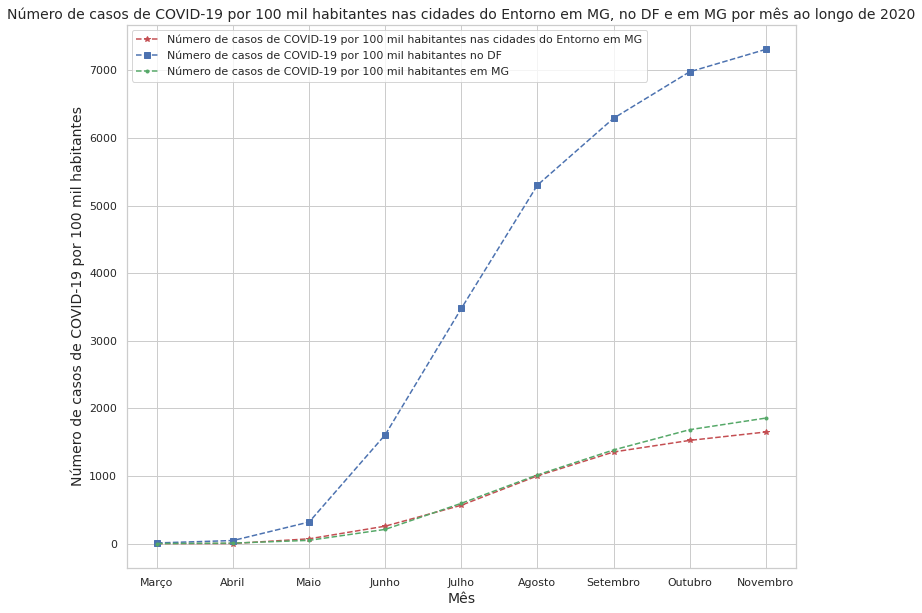

In [68]:
# Agrupando os casos confirmados por data, obtendo a m√©dia dos valores (para obter a m√©dia dos dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_100k_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['confirmed_per_100k_inhabitants'].mean().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_100k_entorno_MG['date'] = pd.to_datetime(historico_casos_100k_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por m√™s('%B') usando a fun√ß√£o strftime. 
# Os valores s√£o agregados, selecionados e o index √© resetado para gerar um dataframe
#
historico_casos_100k_entorno_MG = historico_casos_100k_entorno_MG.groupby(historico_casos_100k_entorno_MG['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('last').sort_values().reset_index()

# Colocando os meses em portugu√™s nos dataframes criados
#
historico_casos_100k_entorno_MG = historico_casos_100k_entorno_MG.replace({"date": meses})

plt.figure(figsize=(12,10))

plt.plot(historico_casos_100k_entorno_MG['date'], historico_casos_100k_entorno_MG['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_MG['date'], historico_casos_100k_MG['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('N√∫mero de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em MG',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes no DF',
            'N√∫mero de casos de COVID-19 por 100 mil habitantes em MG'))

plt.ylabel('N√∫mero de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('M√™s', fontsize=14)
plt.title('N√∫mero de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em MG, no DF e em MG por m√™s ao longo de 2020', fontsize=14)

plt.show()

* As conclus√µes aqui s√£o basicamente as mesmas para a an√°lise anterior (cidades do Entorno de GO):

* **1) O DF continua tendo o maior n√∫mero de casos confirmados por 100 mil habitantes**.

* **2) As cidades do Entorno em MG possuem um n√∫mero de casos por 100 mil habitantes do que o n√∫mero de casos do estado de MG, mesmo sendo somente 4 cidades do estado**.

* **3) Os dados n√£o mostram uma rela√ß√£o clara entre a regi√£o do Entorno em MG e o DF**.

* **4) Entretanto, pela proximidade geogr√°fica e a quantidade de pessoas que frequentam o DF oriundas dessas regi√µes, √© importante sempre analisar a situa√ß√£o da regi√£o do Entorno (tanto as cidades de GO e de MG), ainda mais levando em considera√ß√£o a alta taxa de casos importados/indefinidos de COVID-19 no DF**.

###**9) Conclus√£o**

* O DF √© a regi√£o com maior n√∫mero de casos confirmados por 100 mil habitantes em compara√ß√£o com Goi√°s e Minas Gerais.

* Se consideramos o n√∫mero total e casos confirmados e de mortes, o DF possui n√∫meros menores que GO e MG, principalmente por conta da sua popula√ß√£o, que √© menor que a desses estados.

* O DF possui uma alta taxa de casos de COVID-19 importados/indefinidos (aproximadamente 12.3%), o que indica que √© importante analisar os dados de regi√µes mais pr√≥ximas. Surtos de COVID-19 na regi√£o do Entorno, por exemplo, podem indicar em uma incid√™ncia maior de casos no DF, por muitas pessoas que moram nessas cidades trabalharem, estudarem e frequentarem o DF.

* Apesar disso, com os dados analisados n√£o foi poss√≠vel estabelecer uma rela√ß√£o entre os casos do Entorno e do DF. √â bem prov√°vel que haja sim uma rela√ß√£o, pelo que foi discutido, mas n√£o √© poss√≠vel afirmar isso com base nos dados at√© aqui apurados.

* Um dos fatos que pode explicar a alta taxa de casos por 100 mil habitantes no DF √© a quantidade de testes realizados: o DF √© uma das unidades da Federa√ß√£o que mais testa e, consequentemente, sofre menos de subnotifica√ß√µes do que outros estados.

* Ainda assim, as altas taxas de casos por 100 mil somadas √† alta taxa de casos importados no DF mostram que √© necess√°rio investir em testagem e analisar dados n√£o somente do DF mas de regi√µes vizinhas, para que se possa tomar decis√µes de como enfrentar a pandemia do COVID-19 no DF.

* Os dados tamb√©m mostram que a situa√ß√£o, por mais que tenha melhorados nos √∫ltimos meses, ainda n√£o est√° totalmente sob controle e √© preciso consci√™ncia e coopera√ß√£o de todos para que possamos lidar com a pandemia da melhor maneira poss√≠vel aqui no DF.

###**Refer√™ncias bibilogr√°ficas**

[1] √Åtila Matias, **RIDE-DF (Regi√£o Integrada de Desenvolvimento do Distrito Federal e Entorno)**. Dispon√≠vel em: https://brasilescola.uol.com.br/brasil/ride.htm , Acesso em: 24 de novembro de 2020.

[2] Brasil.io, **COVID-19 Datasets**, Dispon√≠vel em: https://brasil.io/dataset/covid19/caso/ , Acesso em: 24 de novembro de 2020.

[3] √Ålvaro Justen, Enderson Maia, Edgar, Ariel Cavalcante, **API Dataset covid19 no Brasil.IO**, Dispon√≠vel em: https://github.com/turicas/covid19-br/blob/master/api.md#casos , Acesso em: 24 de novembro de 2020.

[4] Carolina Cruz, **DF tem maior taxa de mortes por milh√£o de habitantes do pa√≠s e risco de 2¬™ onda, aponta estudo**, Dispon√≠vel em: https://g1.globo.com/df/distrito-federal/noticia/2020/11/24/ , Acesso em: 24 de novembro de 2020.

[5] Rafael Secunho, Carolina Jardon, **Testagem no Distrito Federal √© a maior do Brasil**, Dispon√≠vel em: https://www.agenciabrasilia.df.gov.br/2020/08/21/testagem-no-distrito-federal-e-a-maior-do-brasil/ , Acesso em: 24 de novembro de 2020.